<a href="https://colab.research.google.com/github/JiHoonMin/python/blob/main/Mnist_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import os
# Import for week 3
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
 
# Prepare for plotting figure
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
    plt.show()
 
def plot_precision_recall_curve(recalls, precisions):
    plt.plot(recalls, precisions)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


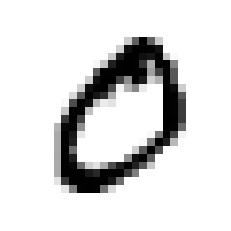

Lable of this digit is:  0


In [ ]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
print('Lable of this digit is: ',y[1])

In [ ]:
y = y.astype(np.uint8)

In [ ]:
X_train, X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test ==7)
# Build model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3,random_state=42)

In [ ]:
sgd_clf.fit(X_train,y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
some_digit = X[1]
sgd_clf.predict([some_digit])

array([False])

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#Build the BaseEsto,atpr
#This classifier with detect not-5 digits
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1),dtype=bool)

In [ ]:
from sklearn.model_selection import cross_val_predict
 
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_7,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
 
confusion_matrix(y_train_7,y_train_pred)

array([[52581,  1154],
       [  688,  5577]])

In [ ]:
y_train_perfect_predictions = y_train_7
 
confusion_matrix(y_train_7,y_train_perfect_predictions)

array([[53735,     0],
       [    0,  6265]])

In [ ]:
from sklearn.metrics import precision_score, recall_score , f1_score
precision = precision_score(y_train_7,y_train_pred)
recall = recall_score(y_train_7,y_train_pred)
f1 = f1_score(y_train_7,y_train_pred)
 
print('Precision: ', precision)
print('Recall: ', recall)
print('F1_score: ',f1)

Precision:  0.8285544495617293
Recall:  0.8901835594573024
F1_score:  0.8582640812557709


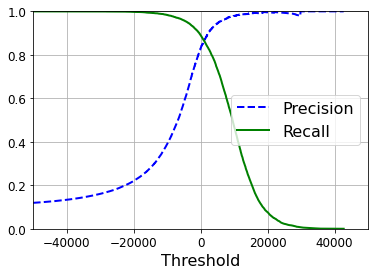

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_7,cv=3,method= "decision_function")
 
precisions, recalls, thresholds = precision_recall_curve(y_train_7,y_scores)
 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

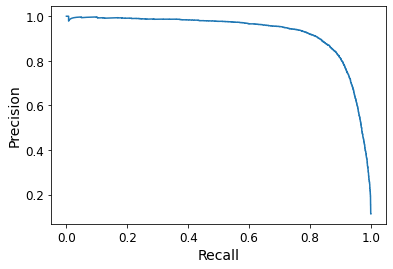

In [ ]:
plot_precision_recall_curve(recalls, precisions)

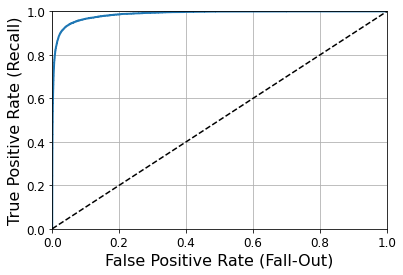

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_7,y_scores)
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7,y_scores)

0.986670497551944

In [ ]:
 A_train, A_test,b_train,b_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
b_train_even = (y_train%2 == 0)
b_test_even = (y_test ==0,2,4,6,8)
# Build model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3,random_state=42)

In [ ]:
 sgd_clf.fit(A_train,b_train_even)

ValueError: ignored

In [ ]:
some_digit = X[1]
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
 from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,A_train,b_train_even,cv=3,scoring='accuracy')

array([0.8406 , 0.84925, 0.83665])

In [ ]:
 #Build the BaseEsto,atpr
#This classifier with detect not-5 digits
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1),dtype=bool)

In [ ]:
 from sklearn.model_selection import cross_val_predict
 
b_train_pred = cross_val_predict(sgd_clf,A_train,b_train_even,cv=3)

In [ ]:
 from sklearn.metrics import confusion_matrix
 
confusion_matrix(b_train_7,b_train_pred)

array([[26881,  3627],
       [ 5843, 23649]])

In [ ]:
 b_train_perfect_predictions = b_train_even
 
confusion_matrix(b_train_even,b_train_perfect_predictions)

array([[30508,     0],
       [    0, 29492]])

In [ ]:
 from sklearn.metrics import precision_score, recall_score , f1_score
precision = precision_score(b_train_even,b_train_pred)
recall = recall_score(b_train_even,b_train_pred)
f1 = f1_score(b_train_even,b_train_pred)
 
print('Precision: ', precision)
print('Recall: ', recall)
print('F1_score: ',f1)

In [ ]:
b_scores = cross_val_predict(sgd_clf,A_train,b_train_even,cv=3,method= "decision_function")
 
precisions, recalls, thresholds = precision_recall_curve(b_train_even,b_scores)
 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [ ]:
 plot_precision_recall_curve(recalls, precisions)

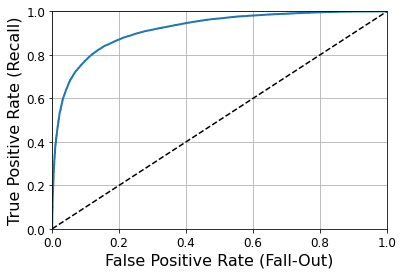

In [ ]:
 from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(b_train_even,b_scores)
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
 from sklearn.metrics import roc_auc_score
roc_auc_score(b_train_even,b_scores)

0.9182892371040935